# Pandas 1

# Announcements - Friday November 11
* Download the files on Canvas->Files->Mike's Lecture Notes->lec27_pandas
* Email
* Please fill out the [exam conflict form](https://cs220.cs.wisc.edu/f22/surveys.html) by Friday
* [Python Tutor](https://pythontutor.com/python-debugger.html#mode=edit)
* Read: [Intro to Pandas](https://cs220.cs.wisc.edu/f22/materials/readings/pandas-intro.html)
* [Common Project Issues Thread on Piazza](https://piazza.com/class/l7f7vr5x63n7l1)
* [Zoom Link](https://uwmadison.zoom.us/j/9741859842?pwd=OURuZnZuL0lhYlJkNVJHR1pLeUQwUT09)
  * Projector Only
  * No Audio
  * The class is not livestreamed 

In [4]:
import os
import json
from json import JSONDecodeError

# Module naming abbreviation
import pandas as pd

### Review - Files & exception handling
- FileNotFoundError
- FileExistsError
    - ironically, used for directories, when using `os.mkdir()`
- JSONDecodeError
    - when json file has incorrect format

### Review 1

In [6]:
# let's figure out how to handle a command to open a file that does not exist

path = input("enter the name of the file to open:")

try:
    f = open(path, "r")  # "r" is for reading, but is the default
    d = f.read()
    print(d)
    f.close()
except FileNotFoundError as e:
    print("I couldn't find your file - check you spelling")


enter the name of the file to open:asdf
I couldn't find your file - check you spelling


### Review 2

In [8]:
# Accidental execution of code containing mkdir twice

try:
    os.mkdir('new_test_dir')
except FileExistsError as e:
    print(str(e))
    
f = open(os.path.join('new_test_dir', 'out.txt'), 'w')
f.write('hi')
f.close()

[WinError 183] Cannot create a file when that file already exists: 'new_test_dir'


In [9]:
def read_json(path):
    with open(path, encoding="utf-8") as f:
        return json.load(f) # dict, list, etc

# data is a dict, list, etc
def write_json(path, data):
    with open(path, 'w', encoding="utf-8") as f:
        json.dump(data, f, indent=2)

### Review 3

In [11]:
# JSONDecodeError - requires import

# Steps:
# Get output of listdir
# Check for files with json extension
# Read each file's contents

files = os.listdir(".")

for f in files:
    if f.endswith(".json"):
        print(f)
        try:
            read_json(f)
        except JSONDecodeError as e:
            print(str(e))

1.json
2.json
Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
3.json
Expecting property name enclosed in double quotes: line 1 column 40 (char 39)
4.json
5.json
Expecting value: line 1 column 11 (char 10)
6.json
Expecting value: line 1 column 11 (char 10)


## Learning Objectives:
- Create a pandas Series from a list or from a dict
- Use Series methods max, min, mean, median, mode, quantile, value counts
- Extract elements from a Series using Boolean indexing
- Access Series members using .loc, .iloc, .items, and slicing
- Perform Series element-wise operations

### What is pandas?
- pandas is a package of tools for doing Data Science
- pandas is installed on top of Python (https://en.wikipedia.org/wiki/Pandas_(software))
    - comes with Anaconda distribution (remember vocab: specification, implementation, distribution)
    - If for some reason, you don't have pandas installed, run the following command in terminal or powershell
        <pre> pip install pandas </pre>

## pandas Series
- combination of dict and list
- can be created either from a python `list` or `dict`
- Terminology:
    - index (equivalent to key in python `dict`)
    - integer position (equivalent to index in python `list`)

## Create a pandas Series from a dict

In [12]:
# create a series from a dict
d = {"one": 7, "two": 8, "three": 9}
d

{'one': 7, 'two': 8, 'three': 9}

In [13]:
s = pd.Series(d)
s

one      7
two      8
three    9
dtype: int64

In [14]:
type(s)

pandas.core.series.Series

In [15]:
s = pd.Series({"one": 7, "two": 8, "three": 9}) # equivalent to the above example
s

one      7
two      8
three    9
dtype: int64

In [ ]:
# IP  index    value
# 0   one      7
# 1   two      8
# 2   three    9

# dtype: int64

## Accessing values with index (.loc[...])

In [16]:
d

{'one': 7, 'two': 8, 'three': 9}

In [17]:
# dict access with key
d["one"]

7

In [18]:
# Series access with index []
s["one"]

7

In [19]:
# Series access with loc[]
s.loc["one"]

7

## Accessing values with integer position (.iloc[...])

In [20]:
s.iloc[0]

7

In [21]:
# last element
s.iloc[-1]

9

## Create a series from a list

In [22]:
# Series created from a list
num_list = [100, 200, 300]
s = pd.Series(num_list)
s

0    100
1    200
2    300
dtype: int64

In [ ]:
# IP  index value
# 0   0      100
# 1   1      200
# 2   2      300
# dtype: int64

In [23]:
print(s.loc[1])
print(s.iloc[1])

200
200


## Slicing series using integer positions

In [24]:
letters_list = ["A", "B", "C", "D"]
letters = pd.Series(letters_list)
letters

0    A
1    B
2    C
3    D
dtype: object

In [25]:
# list slicing - extract the last two elements
print(letters_list)
sliced_letter_list = letters_list[-2:]
sliced_letter_list

['A', 'B', 'C', 'D']


['C', 'D']

Sliced Series retains original Series index, whereas integer positions are renumbered.

In [26]:
print(letters)
sliced_letters = letters.iloc[-2:]
sliced_letters

0    A
1    B
2    C
3    D
dtype: object


2    C
3    D
dtype: object

In [ ]:
# Note: integer positions get renumbered, whereas indexes do not.

# IP  Index  values
# 0   2       C
# 1   3       D
# dtype: object

In [29]:
print(sliced_letters.loc[2])
print(sliced_letters.iloc[0])

C
C


## Slicing series using index

In [30]:
s = pd.Series({"one": 7, "two": 8, "three": 9})
s

one      7
two      8
three    9
dtype: int64

In [35]:
#slicing with indexes - extract last 2 elements
s.loc["two":]


two      8
three    9
dtype: int64

## Statistics on Series
- Use Series methods max, min, mean, median, mode, quantile, value counts

In [36]:
scores = pd.Series([44, 32, 19, 67, 23, 23, 92, 47, 47, 78, 84])
scores

0     44
1     32
2     19
3     67
4     23
5     23
6     92
7     47
8     47
9     78
10    84
dtype: int64

In [38]:
# get the max score
print(scores.max())

# get the index of the max score - idxmax()
print(scores.idxmax())

92
6


In [39]:
print(scores.min())
print(scores.idxmin())

19
2


In [41]:
# count is a built in Series method - compare to len
print(scores.count())
print(len(scores))


11
11


In [42]:
scores.mean()

50.54545454545455

In [43]:
scores.std()

26.051347897426098

In [44]:
scores.median()

47.0

In [45]:
# there could be multiple modes, so mode returns a Series
scores.mode()

0    23
1    47
dtype: int64

#### Quantile function
- enables to calculate percentiles
- takes as argument a float value between 0 and 1
- defaults to 50th percentile

In [47]:
scores.quantile(), scores.median()

(47.0, 47.0)

In [48]:
# 75th percentile
scores.quantile(0.75)

72.5

In [49]:
# 5-percentile summary
print(scores.quantile([0, 0.25, 0.5, 0.75, 1.0]))

0.00    19.0
0.25    27.5
0.50    47.0
0.75    72.5
1.00    92.0
dtype: float64


#### value_counts()
- Series value_counts() creates a series where the key is the data, and the value is its count in the Series
- by default return value Series is ordered by descending order of the counts (values)

In [69]:
ages = pd.Series([18, 19, 20, 20, 20, 17, 18, 24, 25, 35, 22, 20, 21, 21, 20, 23, 23, 19, 19, 19, 20, 21])
age_counts = ages.value_counts()
age_counts

20    6
19    4
21    3
18    2
23    2
17    1
24    1
25    1
35    1
22    1
dtype: int64

## Sorting
- sort_index()
- sort_values()

In [52]:
# sort_index - compare to sorted and .sort
age_counts.sort_index()

17    1
18    2
19    4
20    6
21    3
22    1
23    2
24    1
25    1
35    1
dtype: int64

In [56]:
age_counts.sort_values(ascending = False)

# sort_values in reverse order
# might need to get some help here
# help(pd.Series.sort_values)

20    6
19    4
21    3
18    2
23    2
17    1
24    1
25    1
35    1
22    1
dtype: int64

## Series bar chart

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Count')]

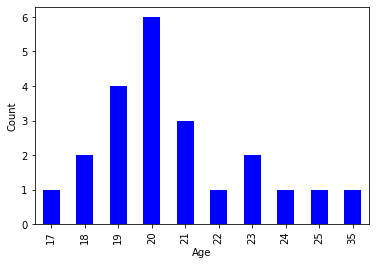

In [57]:
age_plot = age_counts.sort_index().plot.bar(color = 'blue')
age_plot.set(xlabel = "Age", ylabel = "Count")

## Element-wise operations
- Series op scalar

In [61]:
# Let's add 1 to everyone's age
print(ages.value_counts())

ages = ages + 1

print(ages.value_counts())

23    6
22    4
24    3
21    2
26    2
20    1
27    1
28    1
38    1
25    1
dtype: int64
24    6
23    4
25    3
22    2
27    2
21    1
28    1
29    1
39    1
26    1
dtype: int64


## Boolean indexing

- applying boolean expressions on a Series
- boolean expression will be specified within the pair of [  ]
- Boolean operators:
    - & means 'and'
    - | means 'or'
    - ~ means 'not'
    - we must use () for compound boolean expressions

In [64]:
# Extract only ages > 21
# print(ages)
b = ages > 21 # gives you a boolean Series
b

0      True
1      True
2      True
3      True
4      True
5     False
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
dtype: bool

In [65]:
# You can apply boolean Series to the original Series
 # now you get ages which are greater than 21
ages[b]

0     22
1     23
2     24
3     24
4     24
6     22
7     28
8     29
9     39
10    26
11    24
12    25
13    25
14    24
15    27
16    27
17    23
18    23
19    23
20    24
21    25
dtype: int64

In [66]:
# combining the above two steps
ages[ ages>21  ]

0     22
1     23
2     24
3     24
4     24
6     22
7     28
8     29
9     39
10    26
11    24
12    25
13    25
14    24
15    27
16    27
17    23
18    23
19    23
20    24
21    25
dtype: int64

### &, |, and ~
- & means 'and'
- | means 'or'
- ~ means 'not'
- we must use () for compound boolean expressions

In [70]:
# ages boolean
# what ages are in the range 18 to 20, inclusive?

print(ages[ (ages >= 18) & (ages <= 20)  ])

# what percentage of students are in this age range?



0     18
1     19
2     20
3     20
4     20
6     18
11    20
14    20
17    19
18    19
19    19
20    20
dtype: int64


In [ ]:
# what percentage of  students are ages 18 OR 21?

# what percentage of students are NOT 19? 


## CS220 information survey data

In [ ]:
# Modified from https://automatetheboringstuff.com/chapter14/
import csv
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data

data = process_csv("cs220_survey_data.csv")
header = data[0]
data = data[1:]

In [ ]:
header

In [ ]:
data[:3]

In [ ]:
# use list comprehension to extract just ages
age_list = 
# age_list

In [ ]:
cs220_ages = pd.Series(age_list)
cs220_ages

In [ ]:
# Make a Series of the counts of all the ages, sorted from most common to least 
# then sort it by index


In [ ]:
# make a bar chart of the ages sorted by age
age_plot = cs220_ages.value_counts().sort_index().plot.bar(color='blue')
age_plot.set(xlabel = "age", ylabel = "count")

### Statistics

### What is the mode of CS220 student ages?

### What is the 75th percentile of ages?

## Element-wise operations
1. SERIES op SCALAR
2. SERIES op SERIES

In [ ]:
## Series from a dict
game1_points = pd.Series({"Chris": 10, "Kiara": 3, "Mikayla": 7, "Ann": 8, "Trish": 6})
print(game1_points)
game2_points = pd.Series({"Kiara": 7, "Chris": 3,  "Trish": 11, "Mikayla": 2, "Ann": 5, "Meena": 20})
print(game2_points)

### Give 2 additional points for every player's game 1 score

In [ ]:
game1_points + 2

In [ ]:
game1_points = game1_points + 2
game1_points

### Give 3 additional points for every player's game 2 score

In [ ]:
game2_points += 3
game2_points

### Compute total of two series

In [ ]:
# Pandas can perform operations on two series by matching up their indices
total = game1_points + game2_points
total

### Who has the highest points?

In [ ]:
## Who has the most points?
print(total.max())
print(total.idxmax())

In [ ]:
print(total['Kiara'], total[2])

In [ ]:
s = pd.Series([10, 2, 3, 15])
s

### Find all values > 8

In [ ]:
# gives a boolean Series, where each value is True if the original Series values satifies the condition
b = s > 8
b

In [ ]:
# now let's apply the boolean expression, which gives a boolean Series
s[b]

In [ ]:
# Equivalently, you can directly specify boolean expression inside the [ ]
s[s > 8]

In [ ]:
# Decomposing the steps here
# Above example is equivalent to
b = pd.Series([True, False, False, True])
s[b]

### How many students are 25 years or older?

### How many students are in the age range 18 to 20, inclusive?

### What percentage of  students are ages 18 OR 21?